# 회귀분석

회귀 분석은 데이터간의 상관관계 모형을 구해서 데이터를 해석하거나 예측하는 기법을 의미한다. 
간단한 예로는 들어 다음과 같은 데이터를 통과하는 직선을 찾는 기법이 있다. 

    a = np.array([1,3,5,7,9])

<img src = "f2_1.png" align = left>


물론 점들이 정확히 직선에 위치되어있다면 이는 매우 쉬운 문제일 것이다. 하지만 실제 데이터는 노이즈를 포함하여 복잡한 형태를 띄고 있기 때문에 이러한 데이터의 경향성을 파악하는 것은 결코 쉬운 일이 아니다.  

다음과 같은 데이터를 생각해보자 

    b = a + np.random.normal(0,1,5)

<img src = "f2_2.png" align = left>


위의 데이터에 정규분포 평균0, 편차1의 노이즈를 포함한 데이터를 포함한 경우이다.  위에서 다룬 직선은 분명 이번 데이터의 경향성도 어느정도 잘 다루고 있다. 하지만 이것이 얼마나 잘 표현한다고 볼 수 있는가? 

위의 경우는 직선을 통해 표현된 모델과 실제 데이터의 오차를 통해 측정한다. 
특히 이와 같이 데이터간의 상관관계를 연속된 선형관계로 해석하는 기법을 선형회귀분석이라고 한다.  


In [1]:
a = np.array([1,3,5,7,9])
b = a + np.random.normal(0,1,5)
plt.plot(b,'o')
plt.plot(a)
plt.show()


NameError: name 'np' is not defined

<hr style="height:3px">

#  회귀분석의 기초 


앞선 예제의 경우는 가장 오차가 적은 직선을 찾은 경우로서 이러한 직선은 x 의 1차항만을 ( x 제곱 이상은 무시  ) 
포함한 모델을 의미한다. (2차항이 끼면 구부러지기 시작 ) 이러한 경우를 선형 단순 회귀분석이라 칭한다. 

먼저 회귀분석을 위한 가장 단순한 형태의 데이터를 생성해보자 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3])
y = np.array([2,4,6])

plt.plot(x,y,'o')
plt.show()


이는 y = x * 2 의 가장 단순한 형태의 데이터 배치이며이때 오차를 최소화하는 직선 모델은 y = x * 2 이다. 이를 얻기 위해서 여기서는 sklearn 라이브러리의 linear_model 을 사용하도록 하겠다. 

## sklearn.linear_model 사용법


In [ ]:
from sklearn import linear_model 
regr = linear_model.LinearRegression()

위의 모델은 regr 은 선형 회귀분석을 수행할 수 있는 객체이며 fit 이라는 메소드를 통해 회귀분석을 수행한다. 그러면 이를 수행해보자 

In [ ]:
regr.fit(x,y)

아마 기나긴 에러를 보고 당황했을 것이다.  
회귀분석에서 x 는 하나이상의 변수를 가정한다. 변수가 하나인 [1,2,3] 이라면 이 형태로도 괜찮겠지만 [3,4,5] 가 포함될 경우 [[1,2], [2,4], [3,5]] 이런 식으로 입력되는 경우를 가정해서 설계되어있다. 

그러므로 [1,2.3] 이 아니라 

    [[1],
     [2],
     [3]] 
 
의 형태가 되어야 하며 이는 (1,3) 의 배열을 (3,1) 로 바꾸어주어야만 함을 의미한다. 이 경우 reshape 를 사용하면 쉽게 변환이 가능하다. 



In [ ]:
regr.fit(x.reshape(3,1),y)

이제 regr.coef_ 값을 통해 상관 계수 2를 추출할 수 있다.

## coef_ : 상관계수

In [ ]:
print(regr.coef_)

이를 그래프로 표현하면 다음과 같다. 

In [ ]:
plt.plot(x,y, 'o')
plt.plot(x, x * regr.coef_)

이번엔 다음과 같은 데이터를 보자 

In [ ]:
x = np.array([1,2,3])
y = np.array([3,5,7])
plt.plot(x,y,'o')
plt.show()

위의 예제와 같이 기울기.. 즉 상관계수는 2 지만 위의 2,4,6 대신 1을 더한 3,5,7 값을 지닌다. 위의 데이터에 최적화된 직선은 다음과 같은 상수항 1을 지닌다. 

    y = x * 2 + 1 
 
이 상수항은 regr.intercept_ 를 통해 얻을 수 있다.  그러면 이제 이 데이터를 회귀분석 해보겠다.  

In [ ]:
x = np.array([1,2,3])
y = np.array([3,5,7])
regr.fit(x.reshape(3,1), y)
plt.plot(x, y, 'o')
plt.plot(x, x * regr.coef_, label = 'no intercept')
plt.plot(x, x * regr.coef_ + regr.intercept_, label = 'with intercept')
plt.legend()

이번엔 노이즈를 포함한 3 * x + 2 데이터 50개를 생성해서 선형 단순회귀분석을 수행해보자 
노이즈는 편차 5의 정규분포로 생성한다. 

In [ ]:
n = 50
x = np.arange(0,n,1)
y = x * 3 + 2 + np.random.normal(0,5,n)
plt.plot(x,y, 'o')
regr.fit(x.reshape(n,1),y)
plt.plot(x, x * regr.coef_ + regr.intercept_)
plt.show()
print(regr.score(x.reshape(n,1),y))

## score : 결정계수

위에서 회귀분석으로 생성된 모델은 최적화된 직선을 만든다. 그러나 과연 이 직선이 이 데이터를 표현하는데 충분한 모델일까?  위처럼 눈으로 분명히 보인다면 문제가 없지만 3,4차원의 복잡한 데이터는 이렇게 시각화 시키기가 어렵다. 그래서  생성된 회귀모델이 얼마나 데이터를 잘 표현하는지지를 알기 위해서는 직선과 실제 데이터의 오차값의 비율을 측정함으로서 이를 확인할 수 있다. 이러한 수치를 결정계수라고 하며 다음과 같이 계산한다. 

<b> 
    - ( Y 오차 / Y 편차 ) ^ 2 
</b>

Y 오차는 실제 데이터와 모델의 데이터와의 차이값이고 편차는 Y 평균과 Y값의 차이값을 의미한다.. 편차값으로 나누는 이유는 데이터의 규모를 반영하기 위함이다. 다음과 같은 두 경우를 생각해보자 
<b>
    - y값이 평균 1억단위의 편차가 있는데 평균 1000 정도의 오차로 예측

    - y값이 평균 1000 단위의 편차가 있는데 평균 500 정도의 오차로 예측 
</b>
이 두 경우 전자의 경우가 평균오차가 크지만 데이터의 크기와 평균 편차를 생각하면 오히려 후자쪽의 모델보다 이쪽이 더 정확한 모델임을 알 수 있다. 그러므로 편차값을 나눠줌으로서 데이터유 규모를 반영해서 모델의 정확도를 평가하기 위함이다. 

물론 수동으로 이를 작성할 수도 있겠지만 regr 은 자체적으로 이런 메소드를 지원한다.

- score( x, y ) 

x 는 x 데이터와 y 데이터이며 반드시 회귀분석을 수행하던 데이터와 일치하지 안아도 됩니다. 즉 테스트용 데이터를 따로 측정할 수도 있다. (왜 그것이 필요한지는 나중에 언급한다.) 

위의 모델의 적합도 즉, 결정계수를 알기 위해서는 다음과 같이 출력하면 된다. 

In [ ]:
print( regr.score(x.reshape(n,1), y ))

### <font color = 'red'> 연습 2-1 : 다음 데이터를 회귀분석 해보세요
    

In [ ]:
# 데이터 로딩 
ld = np.load('e2_1.npz')
x,y = ld['x'], ld['y']
plt.plot(x,y,'o')

In [ ]:
# 여기에 연습문제 2-1 의 회귀분석 코드를 작성하고 그 직선을 그린 후에 적합도를 출력하세요





<hr style="height:3px">


#  다항 회귀분석

다음과 같은 데이터를 회귀분석한다고 가정하자 아마 numpy 에서 보던 모양과 상당히 유사할 것이다. 

## 2차항 회귀분석

In [ ]:
n = 100
x = np.linspace(-30,30,n)
y = x * x * 5 + np.random.normal(0,300,n)
plt.plot(x,y, 'o')
plt.show()

단순 1차원 항만 가진 회귀분석으로 구하는 것은 매우 어렵다.  결국 다음과 같은 결과를 얻게 된다

In [ ]:
regr.fit( x.reshape(n,1), y ) 
plt.plot(x, y, 'o')
plt.plot(x, x * regr.coef_ + regr.intercept_ )
plt.show()
print( "R2:", regr.score( x.reshape(n,1), y))

결정계수가 0.001 도 안되는 처참한 모델이 탄생한다.  이는 적합한 모델이 아님을 의미한다. 
그렇다면 이런 문제는 회귀분석으로 처리가 불가능한 문제일까?  아니면 이를 위한 새로운 모델이 있을까? 

결론부터 이야기 하면 Linear_Regression 은 기본적으로 모든 선형 구조의 데이터 모델을 대상으로 한다. 즉, 직선이 아닌 곡선도 처리 가능하다는 의미이다.  또한 이를 위해 다른 메소드를 요구하지도 안는다.  

이 데이터의 모델을 위해 다음의 코드를 보자. 


In [ ]:
cx = x.reshape(n,1)
regr.fit( cx * cx , y ) 
plt.plot(x , y, 'o')
plt.plot(x , x * x * regr.coef_ + regr.intercept_ )
plt.show()
print( "R2:", regr.score( cx*cx, y))

어떤가? x 대신 x*x 를 모델의 입력값으로 사용함으로서  

    x * x * regr.coef_ + regr.intercept_
    
형태로 구성하여 0.9 이상의 결정계수를 지닌 모델을 생성하였다. 

### <font color = 'red'> 연습 2-2: 다음 데이터를 회귀분석 해보세요

위의 예를 잘 이해하면 쉽게 풀 수 있을것이다. 

In [ ]:
# 데이터 로딩 
ld = np.load('e2_2.npz')
x,y = ld['x'], ld['y']
plt.plot(x,y,'o')
plt.show() 

In [ ]:
# 여기에 연습문제 2-2의 회귀분석 코드를 작성하고 그 직선을 그린 후에 적합도를 출력하세요

### <font color = 'red'> 연습 2-3: 다음 데이터를 회귀분석 해보세요

아마 다음과 같은 형태도 익숙할 것이다. 이것을 회귀곡선으로 생성해보자. 

In [ ]:
# 데이터 로딩 
ld = np.load('e2_3.npz')
x,y = ld['x'], ld['y']
plt.plot(x,y,'o')
plt.show() 

In [ ]:
# 여기에 연습문제 2-3의 회귀분석 코드를 작성하고 그 직선을 그린 후에 적합도를 출력하세요


<hr>

## 다항 회귀분석

이번엔 독특한 형태를 같이 풀어보도록 하자. 다음과 같은 데이터가 있다고 하자. 
이게 연습문제로 나오면 아마 머리를 싸맬 사람들도 있겠지만 눈치 빠른 사람은 이것이 
x 와 sin(x) 의 합으로 이뤄진 구조임을 눈치 챘을것이다. 

<img src = 'f2_3.png' align = left> 

이 데이터의 생성 식은 다음과 같다. 

In [ ]:
n = 100
x = np.linspace(0, np.pi * 4 ,  n) 
y = np.sin(x) * 3 + x + np.random.normal(0,0.2,n)

이런 모델도 회귀분석에서 분석될 수 있을까? 이런 경우를 위해서 회귀분석에서는 다항 회귀분석을 사용하게 된다. 
요컨데 x1, x2, y 를 

    w1 * x1 + w2 + x2 + w0 = y 
    
라는 모델로 입력이 가능하다는 의미이다. 위의 경우 입력이 sin(x) , x  두가지 값을 이용하여 분석이 가능하다. 단 이를 위해서는 각 배열의 요소들을 하나의 열로 묶어주어야 한다. 예를 들어 다음의 두 배열을 입력으로 넣기 위해서는 

    x1 = [1,2,3]
    x2 = [3,4,5]  

    => [[1,3],
        [2,4],
        [3,5]]
 
 로 묶어줘야한다는 것인데.. 이는 다음과 concatenate 를 사용해도 되지만 다음과 같은 명령으로 좀더 간단히 가능하다. 
        

In [ ]:
x1 = np.array([1,2,3])
x2 = np.array([4,5,6])
x12 = np.c_[x1,x2]
print(x12)

이제 이를 이용해 위의 예제의 x 와 sin(x) 를 model 의 입력에 맞게 바꿔 넣어준다. 

In [ ]:
regr.fit( np.c_[x, np.sin(x)], y ) 

그런데 이전과 달리 이번엔 우리는 x 와 sin(x) 양쪽의 계수가 필요하며 이 경우 coef_ 는 배열값으로 계수를 생성한다. 

- x 의 계수    : coef_[0]
- sinx 의 계수 : coef_[1]

이제 준비가 되었으니 생성된 모델을 도식화하고 그 적합도를 출력하는 코드를 보자.

In [ ]:
plt.plot(x,y,'o')
plt.plot(x, x * regr.coef_[0] + np.sin(x) * regr.coef_[1] + regr.intercept_ ) 
plt.show() 
print( "R2:", regr.score( np.c_[x, np.sin(x)], y ) )

다항 회귀분석은 매우 중요하기때문에 위의 코드를 다시 모아서 아래에 적어두었다. 이해가 안가는 부분이 없도록 잘 살펴보도록하자. 

In [ ]:
n = 100
x = np.linspace(0, np.pi * 4 ,  n) 
y = np.sin(x) * 3 + x + np.random.normal(0,0.2,n)

regr.fit( np.c_[x, np.sin(x)], y ) 

plt.plot(x,y,'o')
plt.plot(x, x * regr.coef_[0] + np.sin(x) * regr.coef_[1] + regr.intercept_ ) 
plt.show() 
print( "R2:", regr.score( np.c_[x, np.sin(x)], y ) )


### <font color = 'red'> 연습 2-4: 다음 다항 데이터를 회귀분석해보세요

참고로 x 는 -8 * 파이 ~ 8 * 파이의 범위를 갖는 데이터이다. 어떤 조합인지 잘 생각해보고 위의 예제를 응용해서 정확도(결정계수) 0.9 이상의 모델을 찾아보자

In [ ]:
# 데이터 로딩 
ld = np.load('e2_4.npz')
x,y = ld['x'], ld['y']
plt.plot(x,y,'o')
plt.show() 

In [ ]:
# 여기에 연습 2-4 의 회귀분석 코드를 작성하세요


<hr>

## 다차항 회기분석

x 대신 x제곱 의 계수를 구하는 그래프를 '2차항 회귀분석' 에서 언급하였다. 이는 기본적으로 

    w*x*x + b

같은 형태로 x = 0 일때 최소값을 같는 그래프이다. 그러나 만일 다음과 같은 형태는 어떻게 해야할까? 

<img src = 'f2_4.png' align = left>


언뜻 똑같다고 느낄 수도 있겠지만 이 그래프의 x 는 -6 ~ 14 의 범위를 갖고 4 에서 최소값을 지닌다. 
이는 y = x * x 의 그래프를 4만큼 이동시킨 형태이다.  즉

    (x -4) * (x - 4) 

의 구조를 갖는다. 이는 언뜻 w * x * x + b 처럼 보이지만 실제로는 x * x - 8 * x + 16 의 2차 다항식이다. 
다행히 우리는 이런 다항식을 다루는 방법을 위에서 다뤘다. 

이제 실제로 이런 모델을 갖는 데이터를 생성하고 이를 회귀분석하도록 해보자. 

In [ ]:
n = 100
x = np.linspace(-6, 14, n)
y = (x - 4) * (x - 4) + np.random.normal(0,5,n)
plt.plot(x,y,'o')

regr.fit( np.c_[x,x*x], y)
w,b = regr.coef_, regr.intercept_

plt.plot(x, x*w[0] + x*x*w[1] + b)
plt.show()

여기까지 잘 따라왔다면 문득 갑갑한 생각이 들 것이다. 

<br>
<b>
    "매번 이렇게 데이터의 특성을 이해하고 모델을 작성해야 하는 것일까?"
</b>

실생활의 문제들은 변수가 x 하나로 해결되는 경우도 많지 안으며 또한 매우 불규칙하고 복잡한 형태를 가진다. 이런 경우 데이터의 특성을 정확하게 파악하는 것은 매우 어렵다.  x 가 1차항으로 이뤄진 모델인지 아니면 2차, 3차항을 지녔는지 모르는 경우에는 어떻게 해야할까? 

답은 가능한 항들을 모두 포함시키는 것이다. 다음 예제를 보자. 

In [ ]:
n = 100
x = np.linspace(0,10,n)
x2 = x * x
x3 = x2 * x
xs = np.c_[x3,x2,x] 

# 데이터 1
y1 = x2 * 4 + 3 + np.random.normal(x,10,n)
regr.fit(xs, y1)
w,b = regr.coef_, regr.intercept_
plt.plot(x,y1, 'o')
plt.plot(x, x3 * w[0] + x2 * w[1] + x * w[2] + b)
print(w,b)
plt.show() 

# 데이터 2
y2 = x * -5 + 2 + np.random.normal(x,1,n)
regr.fit(xs, y2)
w,b = regr.coef_, regr.intercept_
plt.plot(x, y2, 'o')
plt.plot(x, x3 * w[0] + x2 * w[1] + x * w[2] + b)
print(w,b)
plt.show() 

위 두 데이터는 서로 다른 성격을 지녔지만 x의 3차 다항식으로 모두 만족스러운 회귀분석이 가능한 것을 볼 수 있을 것이다. 대부분의 데이터는 최고 차수를 늘릴 경우 상당히 복잡한 데이터도 표현이 가능하다. 삼각함수와 같은 주기함수의 경우도 일정범위내에서는 다차항 방정식으로도 표현이 가능하다. 

In [ ]:
n = 100
x = np.linspace(0,np.pi*2,n)
x2 = x * x
x3 = x2 * x
x4 = x3 * x
xs = np.c_[x4,x3,x2,x] 

y = np.sin(x) + np.random.normal(0,0.1,n)
regr.fit(xs, y)
w,b = regr.coef_, regr.intercept_
plt.plot(x,y, 'o')
plt.plot(x, x4 * w[0] + x3 * w[1] + x2 * w[2] + x * w[3] + b)
print(w,b)
plt.show() 

### <font color = 'red'> 연습 2-5: 2주기 함수 회귀분석

위의 데이터의 그래프를 4주기로 확장하면 다음과 같은 형태를 이룬다. 이 그래프를 결정계수 0.85 이상이 되도록 x의 다차항으로 회귀분석을 해보자. 

In [ ]:
n = 100
x = np.linspace(0,np.pi*4,n)
y = np.sin(x) + np.random.normal(0,0.05,n)
plt.plot(x,y, 'o')
plt.show()


## 다차항 회귀분석을 함수로 만들기

x 를 x 차원까지 n차항 회귀분석을 다음과 같은 형태로 만들 수 있으면 편리할 것이다. 

- polyRegression(x, y, n) 

이를 작성해보자 

먼저 다차항 회귀분석을 위한 입력 np.c_[x, x*x, x*x*x ... ] 을 n 에 의해 생성되게 만들어 보자

In [4]:
import numpy as np
x,n = np.array([1,2,3,4,5]), 3

ax = x.reshape(len(x), 1)
ax = np.c_[x]
for i in range(1,n) :
    ax = np.c_[ax, ax[:,-1] * x]      
    
print(ax)

[[  1   1   1]
 [  2   4   8]
 [  3   9  27]
 [  4  16  64]
 [  5  25 125]]


ax[:, -1] 은 매트릭스의 가장 마지막 열을 의미하며 (numpy 문서의 다차원배열 나누기 부분 참조) , 계속 마지막열에 x 를 곱해서 추가하는 방식으로 x^n 붙여가게 된다. 

이제 입력을 위한 이를 이용해 다음과 같이 다차항 회귀분석을 만들 수 있다. 



In [5]:
from sklearn import linear_model
import numpy as np 

def polyRegression(x,y,n): 
    
    tregr = linear_model.LinearRegression() 
    ax = x.reshape(len(x), 1)
    ax = np.c_[x]
    for i in range(1,n) :
        ax = np.c_[ax, ax[:,-1] * x]            
    tregr.fit(ax,y)    
    r2 = tregr.score(ax,y)
    
    return tregr, r2

이제 위의 함수를 호출해보자. 

In [6]:
x = np.linspace(0, np.pi * 2, 100 )
y = np.sin(x)
regr,r2 = polyRegression( x, y, 6 )
print("R2:", r2)


R2: 0.9999580537444263


### <font color = 'red'> 연습 2-6: 위의 회귀분석에 그래프 출력부분을 추가해보자 </font>

In [7]:
# 여기에 위의 함수를 그래프 출력을 추가하여 정의해보세요
from sklearn import linear_model
import numpy as np 
import matplotlib.pyplot as plt

def polyRegression(x,y,n): 
    
    tregr = linear_model.LinearRegression() 
    ax = x.reshape(len(x), 1)
    ax = np.c_[x]
    for i in range(1,n) :
        ax = np.c_[ax, ax[:,-1] * x]            
    tregr.fit(ax,y)    
    r2 = tregr.score(ax,y)
    
    return tregr, r2

x = np.linspace(0, np.pi * 2, 100 )
y = np.sin(x)
regr,r2 = polyRegression( x, y, 6 )
print("R2:", r2)

R2: 0.9999580537444263



## 다차항 회귀분석 클래스 만들기

위의 다항 회귀분석은 트레이닝셋과 테스트셋이 반드시 동일해야 한다는 단점을 가지고 있다. 만일 linearRegression() 처럼 score 나 plot 을 각각 다른 데이터로 검증할 수 있다면 상당히 편리할 것이다. 그래서 이번엔 polyRegression 을 클래스로 만들고 다음과 같은 메소드를 지원하도록 하겠다 

class : polyRegression(x,y,n) 

- score(x,y)
- plot(x,y,mark)


In [8]:
from sklearn import linear_model
import numpy as np 
import matplotlib.pyplot as plt

class polyRegression :
    
    def createPx(self, x):
        ax = x.reshape(len(x), 1)
        ax = np.c_[x]
        for i in range(1,self.n) :
            ax = np.c_[ax, ax[:,-1] * x]            
        return ax     
            
    def __init__(self, x, y, n) : # 생성자 
        self.x , self.y, self.n = x, y, n
        self.ax = self.createPx(x)
        self.regr = linear_model.LinearRegression() 
        self.regr.fit(self.ax,y)    
    
    def score(self, x=[], y=[] ) :
        if not len(x): 
            x = self.x
        if not len(y): 
            y = self.y
        ax = self.createPx(x)
        
        return self.regr.score(ax, y)
    
    def plot(self, x=[], y=[], mark = '') :
        if not len(x): 
            x = self.x
        if not len(y): 
            y = self.y
        ax = self.createPx(x)
        plt.plot(x,y,'.')   
        ep = self.regr.coef_[0] * ax[:,0]
        for i in range(1,self.n) :        
            ep += ax[:,i] * self.regr.coef_[i] 
        ep += self.regr.intercept_    
        plt.plot(x,ep )


이제 이 클래스를 써서 sin 두가지 sin 데이터를 만들어서 첫번째 데이터로 학습을 하고 두번째 데이터로 스코어와 결과를 그려보도록 하겠다 

R2: 0.9775837016328299


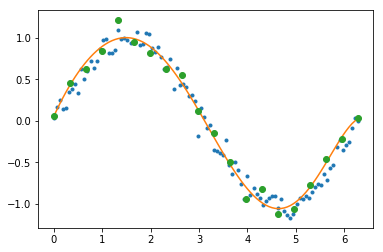

In [21]:
x = np.linspace(0, np.pi * 2, 20) 
y = np.sin(x) + np.random.normal(0, 0.1, 20)

x2 = np.linspace(0, np.pi * 2, 100)
y2 = np.sin(x2) + np.random.normal(0, 0.1, 100)

pr = polyRegression(x,y, 6) # x의 6차 함수까지
print("R2:",pr.score(x2,y2))
pr.plot(x2,y2)
plt.plot(x,y,'o')


<hr style="height:3px">

#  참고: 3차원 이상의 데이터 도식화하기

변수가 2개인 데이터의 경우 2차원보다 분석이 어렵지만 그래도 이를 3차원으로 도식화 시키면 데이터의 성격을 파악하는데 도움이 된다. 이러한 데이터의 분석은 matplotlib 의 확장 라이브러리인 mpl_toolkits.mplot3d 에서 Axes3D 를 사용한다. 

In [23]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


이제 간단한 3d 데이터를 그려보자. 

<IPython.core.display.Javascript object>


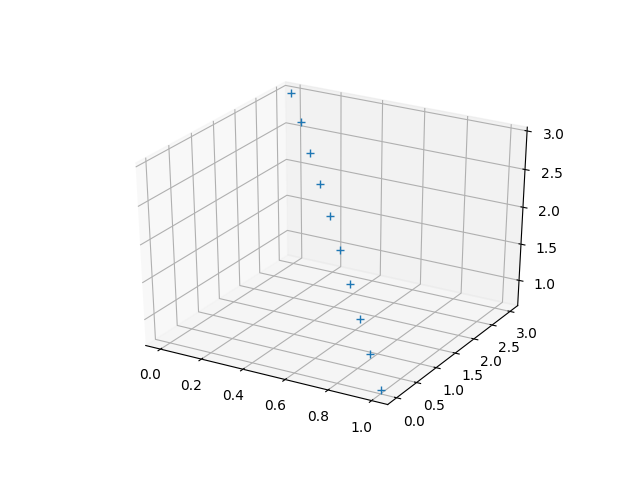

In [24]:
fig = plt.figure()
ax = fig.gca( projection='3d')

n = 10

x = np.linspace(0,1,n)
y = np.linspace(3,0,n)
z = np.log(x + 1) + y 
ax.plot(x,y,z,'+')


plt.show()
